In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data=pd.read_csv("/data/Position_Salaries.csv")

In [3]:
data.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X=data.drop(["Position","Salary"], axis=1)
y=data["Salary"]

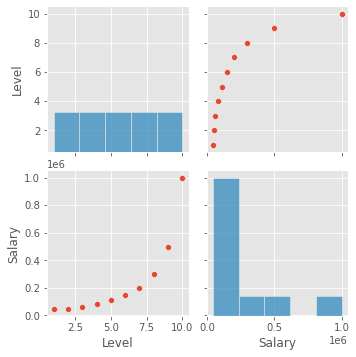

In [5]:
sns.pairplot(data)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [7]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [8]:
print("Öğrenme kesinliği: ",lin_reg.score(X_train,y_train))
print("test kesinliği : ",lin_reg.score(X_test,y_test))

Öğrenme kesinliği:  0.6366049276570868
test kesinliği :  0.8451346684575974


In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly_reg=PolynomialFeatures(degree=5)
X_poly=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.transform(X_test)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)

LinearRegression()

In [19]:
print("Öğrenme kesinliği: ",lin_reg2.score(X_poly,y_train))
print("test kesinliği : ",lin_reg2.score(X_poly_test,y_test))

Öğrenme kesinliği:  0.9999963953442633
test kesinliği :  0.9950481764355716


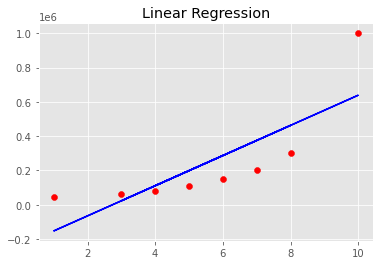

In [20]:
plt.title("Linear Regression")
plt.scatter(X_train,y_train, color="red")
plt.plot(X_train, lin_reg.predict(X_train), color="blue")

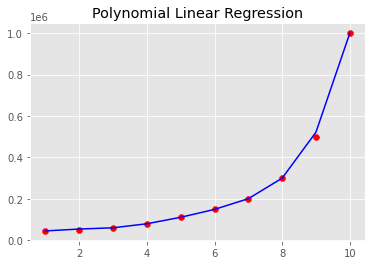

In [21]:
plt.title("Polynomial Linear Regression")
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color="blue")